Alannah Ryan - 18232132

Does the code execute to the end? Yes

https://www.datasciencecentral.com/profiles/blogs/lenet-5-a-classic-cnn-architecture

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 6)        24        
 hNormalization)                                                 
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                      

Text(0, 0.5, 'Loss')

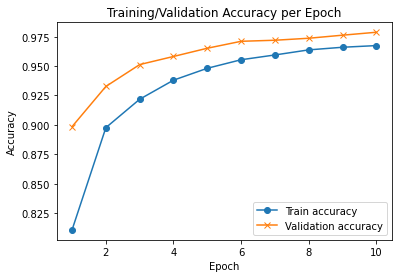

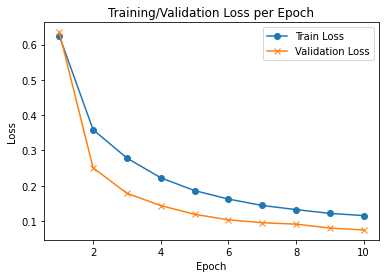

In [7]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist, fashion_mnist
from keras.utils import np_utils
from keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import regularizers
from keras.layers import Dropout

#Instantiate an empty model # 
# This creates our model #
model = Sequential()

# Load dataset as train and test sets #
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8 #
# This is because neural networks work with continuous values, not discrete, and float values work better for this #
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1] #
# This is to get the mean as 0 and the standard deviation as 1, which will reduce training time #
x_train /= 255
x_test /=255

# Transform lables to one-hot encoding #
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array #
# API's take inputs as 4D Arrays,so this is a necessary step #
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

# C1 Convolutional Layer #
model.add(keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding="same"))

# Normalization #
model.add(BatchNormalization())

# S2 Pooling Layer #
model.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C3 Convolutional Layer #
model.add(keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer #
model.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer #
model.add(keras.layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# Flatten the CNN output so that we can connect it with fully connected layers #
model.add(keras.layers.Flatten())

# Dropout Regularization #
model.add(keras.layers.Dropout(0.5))

#FC6 Fully Connected Layer #
model.add(keras.layers.Dense(84, activation='tanh'))

# Normalization #
model.add(BatchNormalization())

# Output Layer with softmax activation #
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model #
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Summary of model #
model.summary()

hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}%, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

import matplotlib.pyplot as plt

# Results #

# Accuracy #
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# Plot legend and use the best location automatically: loc = 0 #
ax.legend(['Train accuracy', 'Validation accuracy'], loc = 0)
ax.set_title('Training/Validation Accuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

# Loss #
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0 #
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
